In [198]:
import pandas as pd


In [199]:

data = pd.read_csv('old.csv')
data.head()

,醫事機構代碼,醫事機構名稱,醫事機構地址,醫事機構電話,成人口罩剩餘數,兒童口罩剩餘數,來源資料時間
0,0145080011,衛生福利部花蓮醫院豐濱原住民分院,花蓮縣豐濱鄉豐濱村光豐路４１號,(03)8358141,2913,1792,2020/02/28 19:46:38
1,0291010010,連江縣立醫院,連江縣南竿鄉復興村２１７號,(083)623995,240,484,2020/02/28 19:46:38
2,2101010013,松山健康服務中心,台北市松山區八德路４段６９４號１、２樓,(02)27653147,50,1115,2020/02/28 19:46:38
3,2101020019,大安健康服務中心,台北市大安區辛亥路３段１５號,(02)27390997,122,880,2020/02/28 19:46:38
4,2101090011,大同健康服務中心,台北市大同區昌吉街５２號１至２樓,(02)25948971,0,560,2020/02/28 19:46:38


In [200]:
data_group = data.groupby('醫事機構代碼')
index = data_group['醫事機構代碼'].unique()

In [201]:
data_group = data.groupby('醫事機構代碼')
data_group = data_group[['醫事機構代碼', '成人口罩剩餘數','兒童口罩剩餘數','來源資料時間']]
data_group.head()

,醫事機構代碼,成人口罩剩餘數,兒童口罩剩餘數,來源資料時間
0,0145080011,2913,1792,2020/02/28 19:46:38
1,0291010010,240,484,2020/02/28 19:46:38
2,2101010013,50,1115,2020/02/28 19:46:38
3,2101020019,122,880,2020/02/28 19:46:38
4,2101090011,0,560,2020/02/28 19:46:38
...,...,...,...,...
325195,5931102121,0,2,2020/02/28 17:40:38
332173,5932023647,8,0,2020/02/28 17:38:39
334425,5946010194,0,4,2020/02/28 17:38:39
338626,5932023647,10,0,2020/02/28 17:36:08


In [202]:

print(type(index[0])," ", index[0][0])

<class 'numpy.ndarray'>   0145080011


In [227]:
data_1 = data_group.get_group(index[2][0])
data_1.shape

(53, 4)

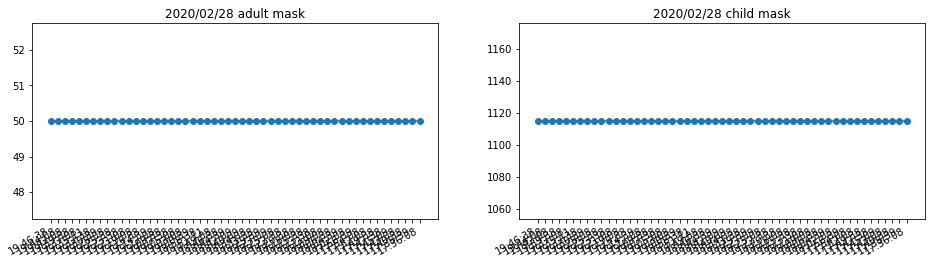

In [233]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


y_adult = data_1['成人口罩剩餘數']
y_child = data_1['兒童口罩剩餘數']

t = data_1['來源資料時間']
t = pd.to_datetime(t)
date = t.dt.strftime("%Y/%m/%d")
t = t.dt.strftime("%H:%M:%S")
date = date.iloc[0]


fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
ax = axes[0]
ax.plot(t, y_adult, 'o-')
ax.set_title(date+" adult mask")
fig.autofmt_xdate() 

ax = axes[1]
ax.plot(t, y_child, 'o-')
ax.set_title(date+" child mask")
fig.autofmt_xdate()